In [32]:
# Setup imports and short-form names for each of the packages needed for data processing and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [43]:
data = pd.read_csv('results-filtered.csv', dtype={'id': str, 'startTime': 'Int64', 'origin': object, 'destination': object, 'totalPower': float, 'graph': object, 'minimumCapacity': float, 'chargeLevelInterval': float, 'optimizedCost': float, 'optimizedCostDuration': float, 'optimizedDuration': float, 'optimizedDurationFinancialCost': float, 'endTime': 'Int64', 'error': object})
data.drop(['graph'], axis=1, inplace=True)
data.index.name = 'Index'
data.head()

,id,startTime,origin,destination,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime,error
Index,,,,,,,,,,,,,
0,901a46fae66,1685120000000,"{""latitude"":58.4948961905085,""longitude"":15.93...","{""latitude"":58.53150705900772,""longitude"":15.7...",2013.489924,43.0,50.0,0.0,2122.4,2122.4,0.0,1685120000000,NaN
1,934d4d47a03,1685100000000,"{""latitude"":56.65562318302232,""longitude"":15.0...","{""latitude"":56.83923771984071,""longitude"":15.1...",3994.521630,43.0,50.0,0.0,3036.8,3036.8,0.0,1685100000000,NaN
2,013218a0647,1684870000000,"{""latitude"":57.34957577123395,""longitude"":14.6...","{""latitude"":57.33213511150875,""longitude"":15.3...",5282.261753,43.0,50.0,0.0,3828.6,3828.6,0.0,1684870000000,NaN
3,26bd020f53d,1684870000000,"{""latitude"":56.920744776437836,""longitude"":15....","{""latitude"":56.62026305251856,""longitude"":14.9...",5466.995023,43.0,50.0,0.0,4035.6,4035.6,0.0,1684870000000,NaN
4,ed218d23ac4,1685140000000,"{""latitude"":60.27798530517961,""longitude"":13.1...","{""latitude"":59.90993621349289,""longitude"":12.9...",5549.230183,43.0,50.0,0.0,4213.5,4213.5,0.0,1685140000000,NaN


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              252 non-null    object 
 1   startTime                       252 non-null    Int64  
 2   origin                          252 non-null    object 
 3   destination                     252 non-null    object 
 4   totalPower                      252 non-null    float64
 5   minimumCapacity                 250 non-null    float64
 6   chargeLevelInterval             250 non-null    float64
 7   optimizedCost                   161 non-null    float64
 8   optimizedCostDuration           161 non-null    float64
 9   optimizedDuration               144 non-null    float64
 10  optimizedDurationFinancialCost  144 non-null    float64
 11  endTime                         155 non-null    Int64  
 12  error                           2 no

## Out of 252 trial routes, 144 were processed successfully

The rest of the routes failed because the server ran out of memory to store the heap. Anecdotally, this always seemed to happen between 48 and 55 million labels on the heap.

In [46]:
data.nunique()

id                                252
startTime                          36
origin                            252
destination                       252
totalPower                        252
minimumCapacity                     2
chargeLevelInterval                 2
optimizedCost                     115
optimizedCostDuration             161
optimizedDuration                 144
optimizedDurationFinancialCost     98
endTime                            33
error                               1
dtype: int64

In [47]:
successful = data[data['optimizedDuration'].notnull()]
successful.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 213
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              144 non-null    object 
 1   startTime                       144 non-null    Int64  
 2   origin                          144 non-null    object 
 3   destination                     144 non-null    object 
 4   totalPower                      144 non-null    float64
 5   minimumCapacity                 144 non-null    float64
 6   chargeLevelInterval             144 non-null    float64
 7   optimizedCost                   144 non-null    float64
 8   optimizedCostDuration           144 non-null    float64
 9   optimizedDuration               144 non-null    float64
 10  optimizedDurationFinancialCost  144 non-null    float64
 11  endTime                         144 non-null    Int64  
 12  error                           0 no

### Cost goes up with duration

Text(0, 0.5, 'Cost (SEK)')

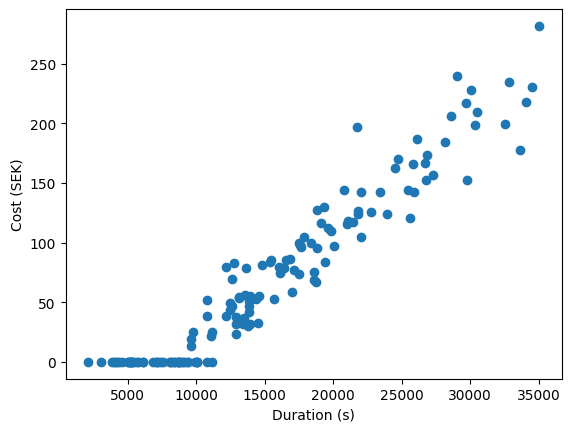

In [53]:
plt.scatter(successful['optimizedCostDuration'], successful['optimizedCost'])
plt.xlabel('Duration (s)')
plt.ylabel('Cost (SEK)')

Text(0, 0.5, 'Cost (SEK)')

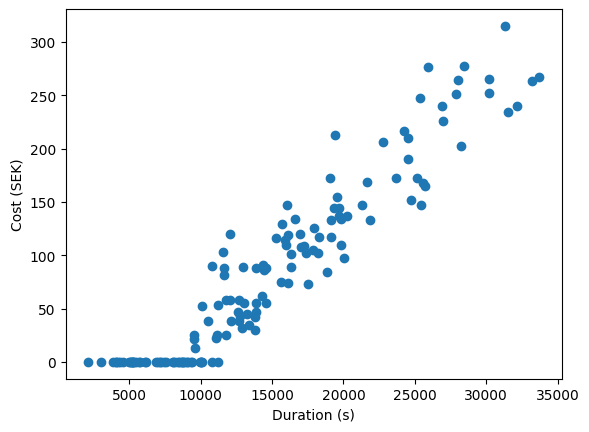

In [52]:
plt.scatter(successful['optimizedDuration'], successful['optimizedDurationFinancialCost'])
plt.xlabel('Duration (s)')
plt.ylabel('Cost (SEK)')

Text(0, 0.5, 'Optimizing for Duration')

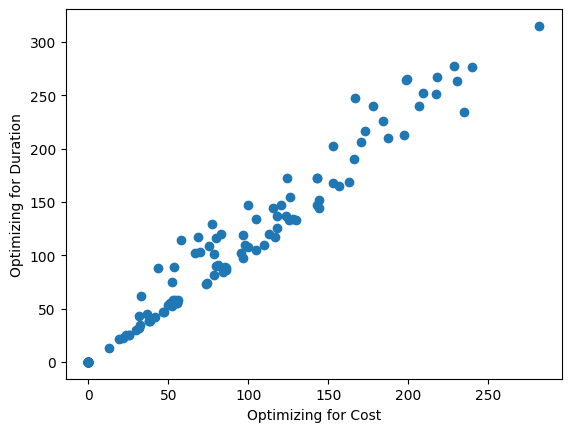

In [54]:
plt.scatter(successful['optimizedCost'], successful['optimizedDurationFinancialCost'])
plt.xlabel('Optimizing for Cost')
plt.ylabel('Optimizing for Duration')

### The cost when optimizing for duration is never less than the cost when optimizing for cost

That is, the optimization is working.

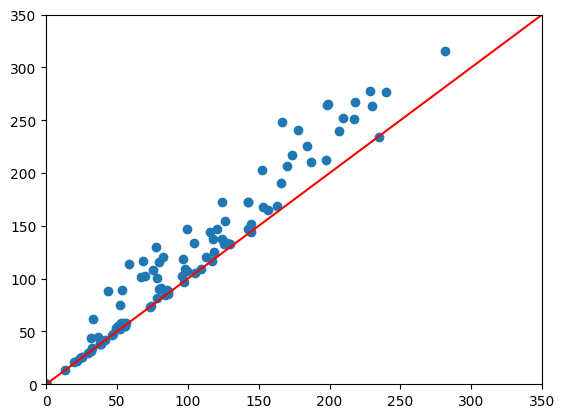

In [58]:
x=successful['optimizedCost']
y=successful['optimizedDurationFinancialCost']
fig, ax = plt.subplots()
plt.xlim(0, 350)
plt.ylim(0, 350)
ax.plot([0, 1], [0, 1], color='red', transform=ax.transAxes)
ax.scatter(x, y)

In [61]:
data.loc[(data['optimizedDurationFinancialCost'] < data['optimizedCost'])]

,id,startTime,origin,destination,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime,error
Index,,,,,,,,,,,,,


### Checking the opposite way, the duration when optimizing for duration is never more than the duration when optimizing for cost

That is, the optimization is working.

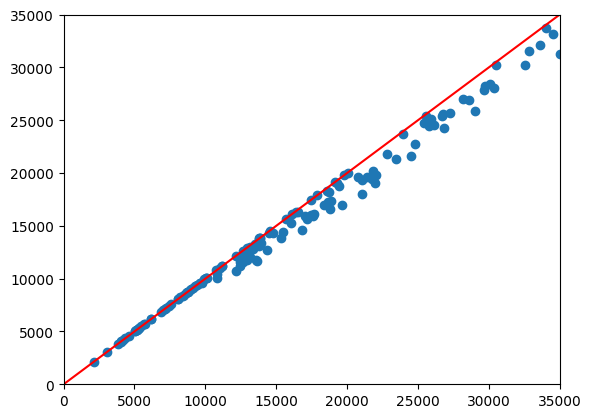

In [64]:
x=successful['optimizedCostDuration']
y=successful['optimizedDuration']
fig, ax = plt.subplots()
plt.xlim(0, 35000)
plt.ylim(0, 35000)
ax.plot([0, 1], [0, 1], color='red', transform=ax.transAxes)
ax.scatter(x, y)

In [66]:
data.loc[(data['optimizedDuration'] > data['optimizedCostDuration'])]

,id,startTime,origin,destination,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime,error
Index,,,,,,,,,,,,,
